In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('bsu/weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
X = df[['Apparent Temperature (C)']]
y = df['Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
model.coef_

array([0.88620763])

In [6]:
y_pred = model.predict(X_test)

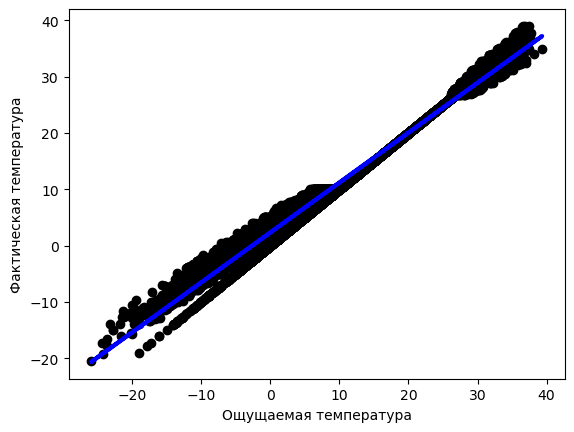

In [7]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Ощущаемая температура')
plt.ylabel('Фактическая температура')
plt.show()

In [8]:
compare = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
compare

,Actual,Predicted
6119,14.422222,15.093512
51443,12.155556,13.084775
18754,23.961111,23.546948
34070,15.000000,15.605543
26082,12.800000,13.655886
...,...,...
74486,24.611111,24.122983
92324,17.672222,17.973687
81506,4.027778,5.881876
10265,2.433333,1.751164


In [9]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 1.3345346795453341


In [10]:
from sklearn.metrics import r2_score
print("R^2", r2_score(y_test, y_pred))

R^2 0.9853570292051811


In [12]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [14]:
X = df[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)']]
y = df['Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Коэффициенты модели:', model.coef_)

Коэффициенты модели: [-3.24911793e+01 -1.99257176e-01  3.84097008e-03]


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:
model.coef_

array([-3.24911793e+01, -1.99257176e-01,  3.84097008e-03])

In [28]:
y_pred = model.predict(X_test)

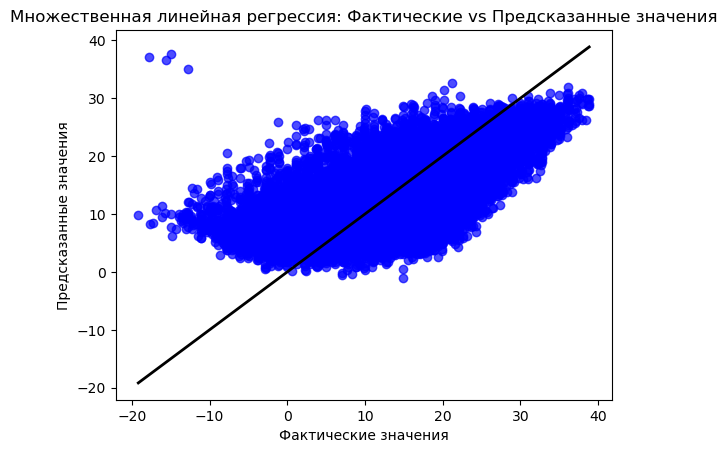

In [30]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linewidth=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Множественная линейная регрессия: Фактические vs Предсказанные значения')
plt.show()


In [32]:
compare = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
compare

,Actual,Predicted
87206,28.122222,18.538724
33421,10.000000,7.972090
6807,14.400000,14.483977
37340,1.016667,7.233396
3016,-0.122222,9.505601
...,...,...
94353,9.183333,10.805354
56859,17.894444,14.507034
9080,10.716667,18.835494
47825,24.888889,17.366665


In [34]:
print("MSE",mean_squared_error(y_test,y_pred))
print("R^2", r2_score(y_test, y_pred))

MSE 53.667587981786234
R^2 0.4176648212488474


In [36]:
from sklearn.preprocessing import PolynomialFeatures

X = df[['Apparent Temperature (C)']]
y = df['Temperature (C)']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

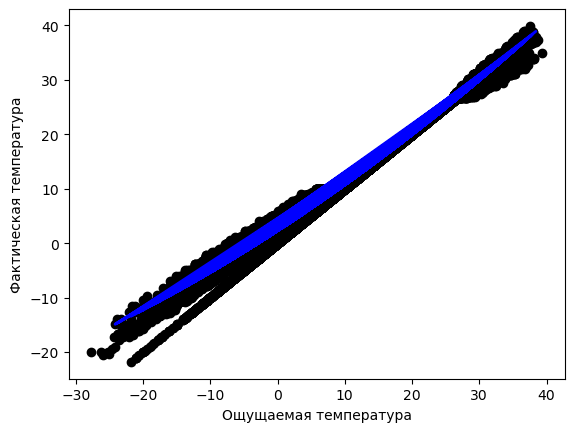

In [42]:
plt.scatter(X['Apparent Temperature (C)'], y, color='black')
plt.plot(X_test[:, 1], y_pred, color='blue', linewidth=2)
plt.xlabel('Ощущаемая температура')
plt.ylabel('Фактическая температура')
plt.show()

In [43]:
print("MSE",mean_squared_error(y_test,y_pred))
print("R^2", r2_score(y_test, y_pred))

MSE 1.0701077321737158
R^2 0.9883884966525818


In [46]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [48]:
from sklearn.linear_model import LogisticRegression
df['Hot'] = np.where(df['Temperature (C)'] > 20, 1, 0)

X = df[['Humidity', 'Pressure (millibars)']]
y = df['Hot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Создание модели
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred = model.predict(X_test)

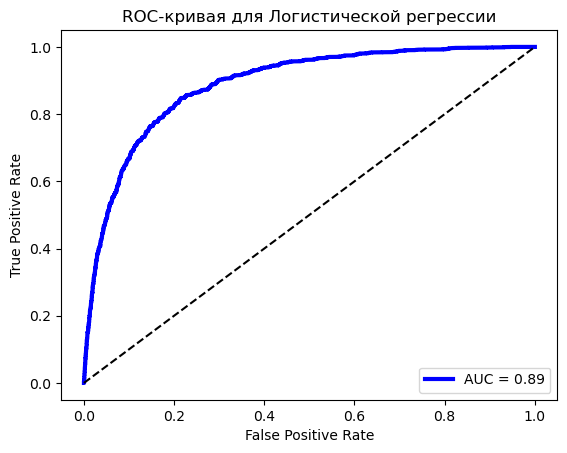

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, color='blue', linewidth=3, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для Логистической регрессии')
plt.legend(loc='lower right')
plt.show()

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
accuracy = model.score(X_test, y_test)
print('Точность модели:', accuracy)
accuracy = model.score(X_test, y_test)
print('Точность модели:', accuracy)

cm = confusion_matrix(y_test, y_pred)
print('Матрица ошибок:\n', cm)

report = classification_report(y_test, y_pred)
print('Отчет о классификации:\n', report)

Точность модели: 0.8531439531387693
Точность модели: 0.8531439531387693
Матрица ошибок:
 [[14179   994]
 [ 1839  2279]]
Отчет о классификации:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     15173
           1       0.70      0.55      0.62      4118

    accuracy                           0.85     19291
   macro avg       0.79      0.74      0.76     19291
weighted avg       0.84      0.85      0.85     19291



In [58]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Hot
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,0


In [60]:
from sklearn.tree import DecisionTreeRegressor

X = df[['Apparent Temperature (C)', 'Humidity', 'Pressure (millibars)']]
y = df['Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(max_depth=5,random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [62]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 1.078519190152177
R² Score: 0.9882972257743916


In [75]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(model,
                           out_file=None,
                           feature_names=X_train.columns,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           precision=2)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'

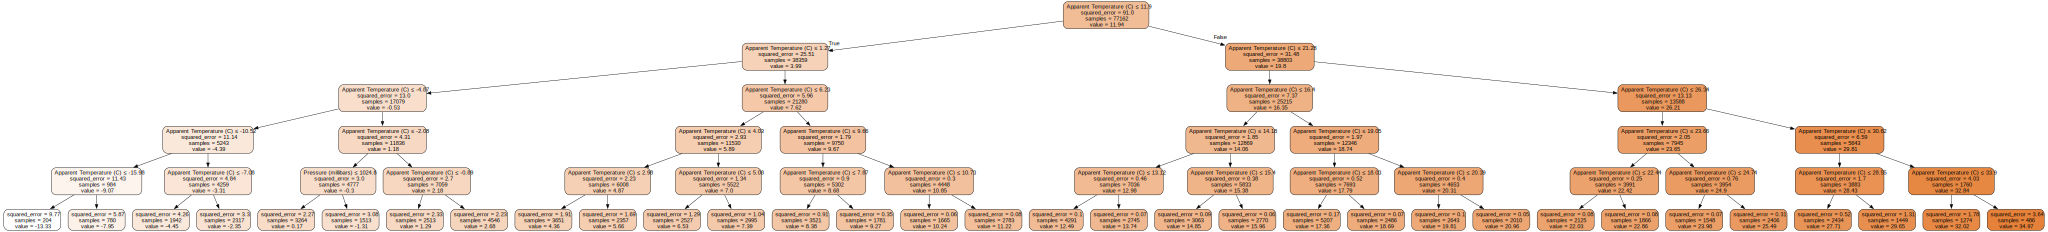

In [78]:
graph